## Practical Machine Learning
### Assignment 2: Evaluating Regression Models

Description:
This individual assignment involves fitting regression models with Python. You are asked to fit regression models to data from the Boston Housing Study, as described in the attached handout:

Boston_Housing_Study-1.pdf

For your convenience, the data set (comma-delimited file boston.csv) and initial code for reading those data into Python are attached here:

jump-start-boston-housing-v001.zip

Instructions:
- Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: 
   (1) the median value of homes in thousands of 1970 dollars or 
   (2) the log median value of homes in thousands of 1970 dollars. 
- Employ at least TWO regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
- Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.
- Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?


Programming Resources:
A detailed example shows how to evaluate alternative regressors within a cross-validation design:

Modules / Technical Resources / Regression Examples: Predicting Sales


GRADING GUIDELINES (50 points)
--------------------------------
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook

OR 

- Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include 
    (1) a summary and problem definition for management; 
    (2) discussion of the research design, measurement and statistical methods, traditional machine learning methods employed; 
    (3) overview of programming work; and 
    (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google's Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


Variable         Name Description
-------------------------------------
neighborhood --> Name of the Boston neighborhood
                 (location of the census tract)
mv           --> Median value of homes in thousands of 1970 dollars
nox          --> Air pollution (nitrogen oxide concentration)
crim         --> Crime rate
zn           --> Percent of land zoned for lots
indus        --> Percent of business that is industrial or nonretail
chas         --> On the Charles River (1) or not (0)
rooms        --> Average number of rooms per home
age          --> Percentage of homes built before 1940
dis          --> Weighted distance to employment centers
rad          --> Accessibility to radial highways
tax          --> Tax rate
ptratio      --> Pupil/teacher ratio in public schools
lstat        --> Percentage of population of lower socio-economic status


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.


In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)
# set df options 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
import math
from math import sqrt  # for root mean-squared error calculation
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 189
# Although we standardize X and y variables on input, we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [3]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
boston_input.head()
boston_input.tail()


boston DataFrame (first and last five rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [4]:
# note data types, counts and any missing data 
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [5]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


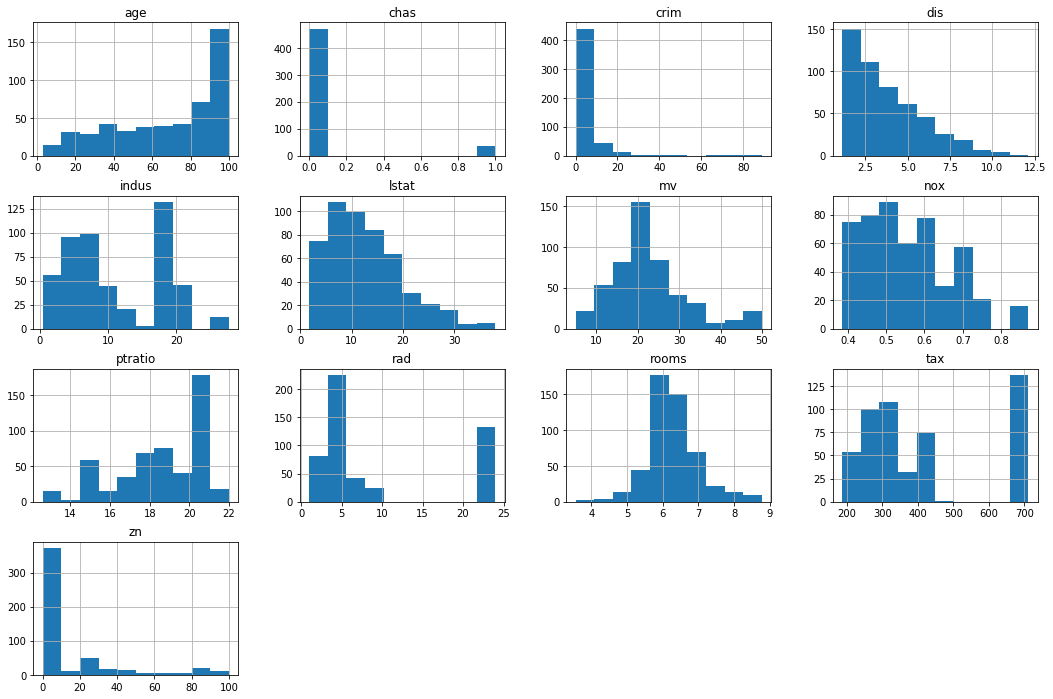

In [6]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston');

(array([ 21.,  54.,  82., 155.,  84.,  41.,  31.,   7.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

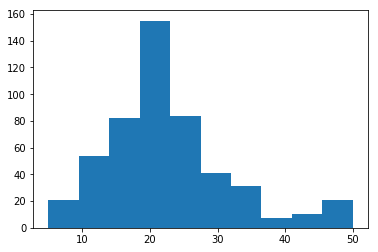

In [7]:
# Single histogram of response variable : Median Value
plt.hist(boston['mv'])
plt.show('plot-histogram-boston-mv')

In [8]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

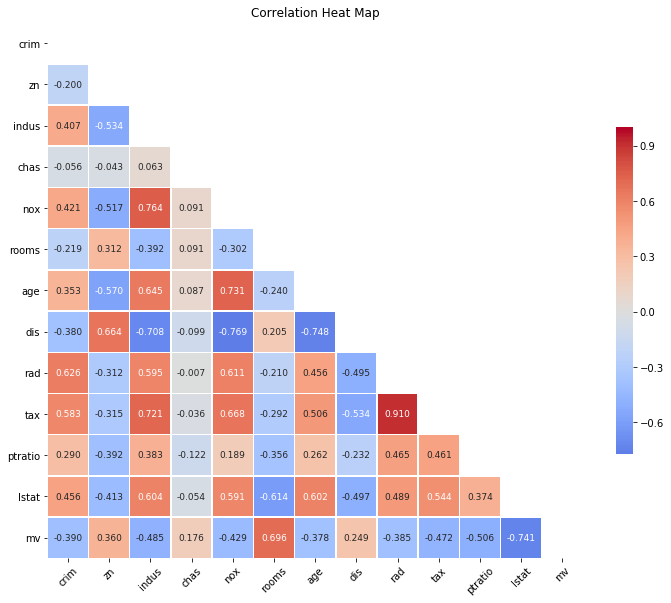

In [9]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

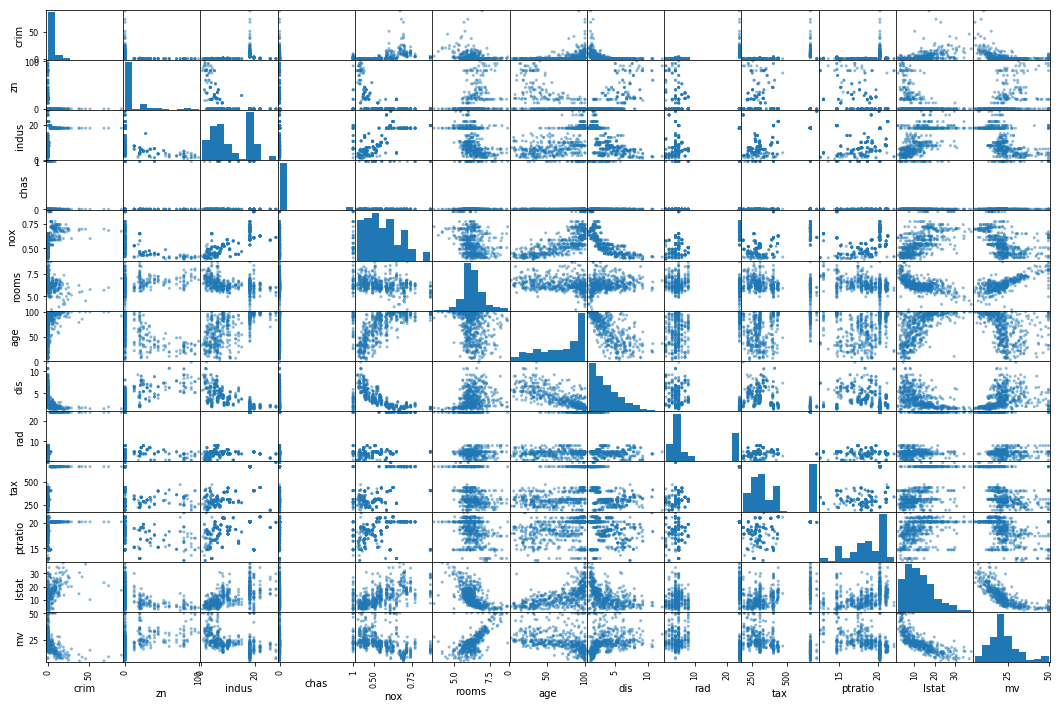

In [10]:
#Creare scatter plots of boston houisng data set. 
scatter_matrix(boston, figsize=(18, 12))
plt.show('Scatter Plot Matrix of boston data set');

In [11]:
print('\nDescriptive statistics of the boston DataFrame:')
boston.describe()


Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [13]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [14]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [15]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [16]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

In [17]:
# list of regression model names
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression'] 

In [18]:
# list of regressors
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls
regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED)]

In [19]:
# specify the k-fold cross-validation design for MV
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))


kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.005032049293645764
Fitted regression coefficients: [-0.111  0.136  0.014  0.079 -0.238  0.268  0.007 -0.371  0.27  -0.232
 -0.215 -0.455]
Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.00477362076107906
Fitted regression coefficients: [-0.11   0.134  0.011  0.079 -0.234  0.269  0.006 -0.367  0.263 -0.224
 -0.214 -0.453]
Coefficient of determination (R-squared): 0.7670378077121718
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.30674447231421376

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.010115332705293557
Fitted regression coefficients: [-0.002  0.    -0.     0.016 -0.     0.293 -0.    -0.    -0.    -0.012
 -0.149 -0.405]
Coefficient of determination (R-squared): 0.7712646476211942
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3039489652625287

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.010146832850782737
Fitted regression coefficients: [-0.032  0.    -0.     0.051 -0.027  0.311 -0.    -0.045 -0.    -0.037
 -0.168 -0.392]
Coefficient of determination (R-squared): 0.7753975899539927
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3011904719557345

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: 0.014758668479534831
Fitted regression coefficients: [-0.114  0.137  0.03   0.074 -0.277  0.25   0.012 -0.383  0.287 -0.255
 -0.227 -0.453]
Coefficient of determination (R-squared): 0.46067574628462904
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.4148885192245404

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: 0.014751354592896948
Fitted regression coefficients: [-0.113  0.135  0.027  0.074 -0.273  0.252  0.011 -0.379  0.278 -0.246
 -0.225 -0.451]
Coefficient of determination (R-squared): 0.46579221712274843
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.4129158436126736

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.01218731037511539
Fitted regression coefficients: [-0.001  0.    -0.     0.015 -0.     0.275 -0.    -0.    -0.    -0.004
 -0.159 -0.424]
Coefficient of determination (R-squared): 0.6520680038258773
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.33323731456183026

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.013736106428359603
Fitted regression coefficients: [-0.031  0.    -0.     0.051 -0.052  0.295 -0.    -0.056 -0.    -0.022
 -0.179 -0.404]
Coefficient of determination (R-squared): 0.6489188948360789
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.33474197180286874

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.014115159953405641
Fitted regression coefficients: [-0.107  0.1   -0.046  0.09  -0.3    0.268  0.039 -0.361  0.29  -0.174
 -0.217 -0.482]
Coefficient of determination (R-squared): -1.31117513765073
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.4389384002541711

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.01378171105223238
Fitted regression coefficients: [-0.106  0.098 -0.049  0.09  -0.295  0.269  0.037 -0.357  0.281 -0.167
 -0.216 -0.48 ]
Coefficient of determination (R-squared): -1.2803147541226392
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.4359980497370254

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.0009893559205032612
Fitted regression coefficients: [-0.     0.    -0.     0.022 -0.     0.294 -0.    -0.    -0.    -0.
 -0.156 -0.426]
Coefficient of determination (R-squared): -0.16418279785875822
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3115284662303818

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.0035038134416471786
Fitted regression coefficients: [-0.029  0.    -0.     0.058 -0.022  0.31  -0.    -0.048 -0.    -0.015
 -0.18  -0.42 ]
Coefficient of determination (R-squared): -0.23403251396154068
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.32073802399581003

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.014029096554712628
Fitted regression coefficients: [-1.170e-01  1.108e-01 -9.948e-05  8.705e-02 -2.058e-01  2.185e-01
  6.986e-03 -3.206e-01  2.729e-01 -2.314e-01 -2.234e-01 -4.387e-01]
Coefficient of determination (R-squared): 0.6328856607774367
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6522437994589771

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.014152079867047682
Fitted regression coefficients: [-0.116  0.109 -0.003  0.088 -0.202  0.22   0.006 -0.317  0.265 -0.224
 -0.222 -0.437]
Coefficient of determination (R-squared): 0.6318124406179929
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6531964867707817

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.037083263109307735
Fitted regression coefficients: [-0.009  0.    -0.     0.026 -0.     0.227 -0.    -0.    -0.    -0.
 -0.141 -0.402]
Coefficient of determination (R-squared): 0.4234577110284604
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.8173816226257143

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.02994929318360201
Fitted regression coefficients: [-0.037  0.    -0.     0.067 -0.     0.253 -0.    -0.014 -0.    -0.02
 -0.165 -0.391]
Coefficient of determination (R-squared): 0.47764365750230775
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7780235114030633

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.01198015202771395
Fitted regression coefficients: [-0.111  0.148 -0.006  0.127 -0.268  0.205  0.072 -0.365  0.275 -0.224
 -0.231 -0.473]
Coefficient of determination (R-squared): 0.5342286831540056
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6217833818375665

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.012099806291056378
Fitted regression coefficients: [-0.11   0.146 -0.008  0.127 -0.265  0.207  0.07  -0.361  0.267 -0.217
 -0.23  -0.471]
Coefficient of determination (R-squared): 0.5363005637661609
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6203989076135007

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.02855006170301238
Fitted regression coefficients: [-0.     0.    -0.     0.004 -0.     0.236 -0.    -0.    -0.    -0.
 -0.158 -0.439]
Coefficient of determination (R-squared): 0.5375157042637307
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.619585485908222

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.020508719125028232
Fitted regression coefficients: [-0.026  0.    -0.     0.065 -0.024  0.261 -0.    -0.031 -0.    -0.008
 -0.182 -0.422]
Coefficient of determination (R-squared): 0.594960905848789
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.5798307080909457

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: 0.005659958784834551
Fitted regression coefficients: [-0.113  0.148  0.035  0.09  -0.265  0.232  0.002 -0.348  0.277 -0.24
 -0.201 -0.448]
Coefficient of determination (R-squared): 0.7248910073380552
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.49601152882865296

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: 0.005178655362715584
Fitted regression coefficients: [-0.112  0.146  0.032  0.09  -0.261  0.233  0.001 -0.344  0.269 -0.232
 -0.2   -0.447]
Coefficient of determination (R-squared): 0.7251740530340207
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.49575630260601533

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.03602482612059721
Fitted regression coefficients: [-0.009  0.    -0.     0.    -0.     0.218 -0.    -0.    -0.    -0.
 -0.107 -0.435]
Coefficient of determination (R-squared): 0.42708462173697925
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7157883365828116

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.025814025794535858
Fitted regression coefficients: [-0.037  0.    -0.     0.05  -0.042  0.252 -0.    -0.014 -0.    -0.
 -0.141 -0.403]
Coefficient of determination (R-squared): 0.5488571408748044
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.6351794243987483

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: 0.008941252403873789
Fitted regression coefficients: [-0.114  0.113 -0.001  0.073 -0.251  0.265  0.001 -0.397  0.279 -0.25
 -0.222 -0.445]
Coefficient of determination (R-squared): 0.3782678938987154
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.343828185197933

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: 0.009359395558447059
Fitted regression coefficients: [-1.133e-01  1.104e-01 -4.082e-03  7.353e-02 -2.465e-01  2.666e-01
  1.192e-04 -3.918e-01  2.693e-01 -2.408e-01 -2.211e-01 -4.435e-01]
Coefficient of determination (R-squared): 0.3867221835947976
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3414825024396862

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.032038188671029845
Fitted regression coefficients: [-0.001  0.    -0.     0.01  -0.     0.273 -0.    -0.    -0.    -0.01
 -0.147 -0.441]
Coefficient of determination (R-squared): 0.11908627653335713
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.40926679964096324

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.03129021485487583
Fitted regression coefficients: [-0.031  0.    -0.     0.048 -0.014  0.297 -0.    -0.011 -0.    -0.03
 -0.164 -0.416]
Coefficient of determination (R-squared): 0.16279268097613486
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.39898478613605265

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.043045602135584504
Fitted regression coefficients: [-0.022  0.056  0.043  0.031 -0.191  0.532 -0.095 -0.264  0.086 -0.23
 -0.199 -0.19 ]
Coefficient of determination (R-squared): -0.014566207830289724
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 1.34082722477313

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.04296490778827665
Fitted regression coefficients: [-0.022  0.055  0.041  0.031 -0.189  0.531 -0.095 -0.262  0.082 -0.225
 -0.198 -0.191]
Coefficient of determination (R-squared): -0.0128058692310975
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 1.3396635083924238

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.023849590564962858
Fitted regression coefficients: [-0.     0.    -0.     0.    -0.     0.491 -0.    -0.    -0.    -0.102
 -0.138 -0.203]
Coefficient of determination (R-squared): 0.033942779447400206
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 1.3083804564249102

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: -0.03380366712089611
Fitted regression coefficients: [-0.     0.    -0.     0.    -0.022  0.49  -0.    -0.    -0.    -0.123
 -0.166 -0.215]
Coefficient of determination (R-squared): 0.012797921367182719
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 1.3226217294160258

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: 0.03370025325331892
Fitted regression coefficients: [-0.156  0.114  0.019  0.065 -0.181  0.35  -0.018 -0.323  0.324 -0.234
 -0.193 -0.398]
Coefficient of determination (R-squared): -1.04100084176042
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6697047890403504

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: 0.03365704976823637
Fitted regression coefficients: [-0.154  0.113  0.016  0.065 -0.178  0.351 -0.019 -0.32   0.316 -0.227
 -0.192 -0.397]
Coefficient of determination (R-squared): -1.0381588329307827
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6692383585726623

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.047987306087020884
Fitted regression coefficients: [-0.     0.    -0.     0.005 -0.     0.384 -0.    -0.    -0.    -0.
 -0.116 -0.332]
Coefficient of determination (R-squared): -1.5514939180499288
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7487883544124373

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.04035001611129162
Fitted regression coefficients: [-0.023  0.    -0.     0.041 -0.     0.383 -0.    -0.032  0.    -0.
 -0.145 -0.364]
Coefficient of determination (R-squared): -1.2832934497733932
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.708341485728344

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitted regression intercept: -0.004165299014140228
Fitted regression coefficients: [-0.107  0.131  0.013  0.076 -0.226  0.28   0.042 -0.336  0.326 -0.309
 -0.206 -0.452]
Coefficient of determination (R-squared): 0.477957357260997
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3331377635873666

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=189, solver='cholesky', tol=0.001)

Fitted regression intercept: -0.004046984711110105
Fitted regression coefficients: [-0.106  0.129  0.01   0.076 -0.223  0.281  0.04  -0.333  0.313 -0.296
 -0.205 -0.45 ]
Coefficient of determination (R-squared): 0.48862051999665856
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 189, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3297178997223888

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=189,
      selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.006583390749236792
Fitted regression coefficients: [-0.003  0.    -0.     0.016 -0.     0.307 -0.    -0.    -0.    -0.
 -0.145 -0.406]
Coefficient of determination (R-squared): 0.5598113511807492
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3059076204007171

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=189, selection='cyclic', tol=0.01, warm_start=False)

Fitted regression intercept: 0.001523008052478965
Fitted regression coefficients: [-0.032  0.    -0.     0.051 -0.022  0.322 -0.    -0.049 -0.    -0.032
 -0.164 -0.398]
Coefficient of determination (R-squared): 0.5732958512365804
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 189, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.30118567276469327


In [20]:
cv_results_df.mean().sort_values()

Ridge_Regression         0.560511
Linear_Regression        0.561940
ElasticNet_Regression    0.568084
Lasso_Regression         0.587381
dtype: float64

### Boston Housing Study: 
Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### REPORT/FINDINGS: 

(1) A summary and problem definition for management; 

The real estate brokerage firm wants to use  machine learning to complement conventional methods for assessing the market value of residential real estate. So they'd like to know which modeling method to use, in other words, which one performs best at predicting real estate values.  

---
(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; 

This assignment involved fitting regression models to data from the Boston Housing Study. We used all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. The response variable was the median value of homes in thousands of 1970 dollars. Four regression modeling methods were employed: linear regression, ridge regression, lasso regression, and elastic net. These methods were evaluated within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.

---
(3) Overview of programming work; 

The Boston Housing data was read into python and we looked at the structure of the data, namely data types and counts for each variable and verified there was no missing data. We only used the numeric variables, and the variable 'neighborhood' was dropped from the dataset. We looked at the distribution of non-categorical variables in histograms. We examined correlations among variables in the dataset through a correlation matrix and scatterplots. We also reviewed descriptive statistics for the variables. In preparation for the machine learning steps, we transformed the data into an array, and ran it through StandardScaler. Next we selected 4 modeling methods  for evaluation, and set up the k-fold cross-validation design for the response variable, median value. We iterated through the models, and looked at the mean RMSE for each model. 

---
(4) Review of results with recommendations for management.

The initial data explored revealed that the tax rate and accessibility to radial highways are highly correlated (0.91), air pollution (nitrogen oxide concentration) and percent of business that is industrial or nonretail had a correlation of 0.764, and percentage of homes built before 1940 and air pollution were also highly correlated (0.731). This makes sense since nowadays people are more aware of environmental and health issues, and less likely to want to live close to a heavily indstustrial area, and this is something companies consider before beginning a housing development project. The respone variable, median value of homes in thousands of 1970 dollars, was positively correlated with average number of rooms per home (0.695), and very negatively correlated with percentage of population of lower socio-economic status. This also makes sense since larger homes with more rooms will have a higher value; and people with a higher socioeconomic status are more likely to buy higher value houses than those with a lower socioeconomic status. 

In terms of model evaluation, the most common performance measure of a regression model is the Root Mean Square Error (RMSE), so my recommendation to the firm should be the model that has the lowest RMSE, which in this case is Ridge Regression. However, I also noticed that the performance of Ridge and Linear Regression was extremely close. This is a case where it might be better to recommend Linear Regression to management, because when model error is almost equivalent, it's better to go with the simpler model. Simpler models are easier to explain (in terms of relationships between variables), which is important from a business perspective, and also less work to maintain. Since the main goal of this study is to PREDICT and not explain, the only reason not to go with the simpler model is if a different model has a MUCH higher performance (or MUCH lower RMSE). 

